## LAB_6 - Logistic Regression
### Name: Ramya Chandran
### StudenID: 8895789

1. Using SciKit-Learn, train a logistic regression model on the Iris dataset. Use all four features. Define only 2 labels: `virginica` and `non-virginica`. See the logistic regression notebook presented in class for a demonstration on how to set up these labels (3 points).
2. Provide insights about the model prediction. This is an open-ended part. But you can look into questions such as _in which data instances is the model wrong? are there any shared properties for these cases?_ and _how is the model doing, across a set of _performance metrics_ such as _accuracy_ and _confusion metric_. (3 points)

In [131]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score


### Data Extraction

In [132]:
# Importing iris dataset 
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
#iris_df['target'] = iris.target_names[iris.target]

# View the dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [133]:
# Let's check the dimensions of the dataframe
iris_df.shape

(150, 4)

In [134]:
# let's look at the statistical aspects of the dataframe
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [135]:
# Let's see the type of each column
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [136]:
# Describe the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [137]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Data Visualization

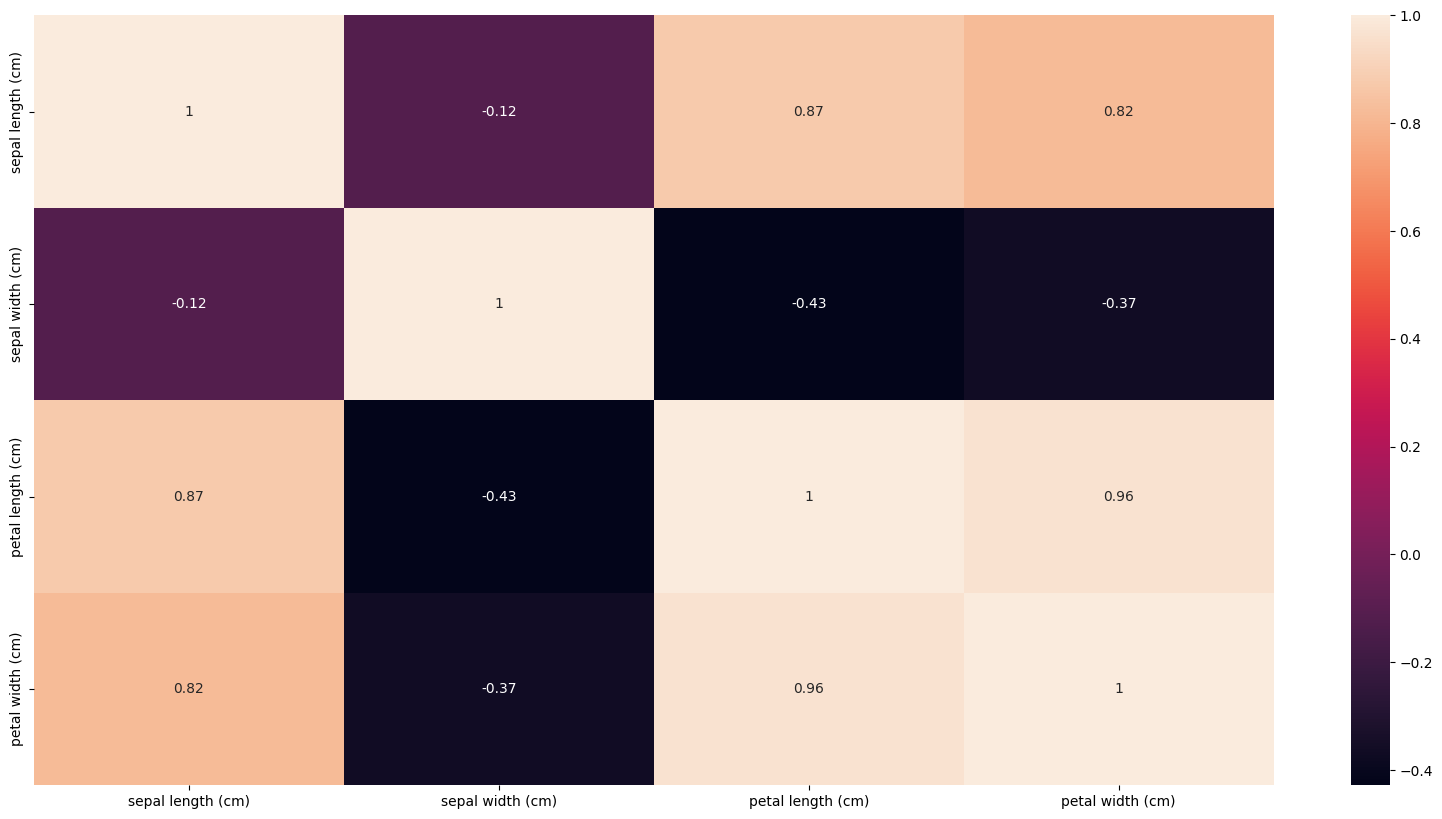

In [138]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(iris_df.corr(),annot = True)
plt.show()

* Here the attributes petal length and petal width is highly correlated with the correlation rate of 96%

### Data Modelling

In [139]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [140]:
# Split the dataset into features (X) and labels (y): and the y lable consists of just 2 labels: `virginica` and `non-virginica` as requested
X = iris_df
y = iris.target_names[iris.target] == 'virginica'

# Split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [141]:
# Mentions the unique value of target either virginica is true or false
np.unique(y)

array([False,  True])

In [142]:
# Create and train the logistic regression model:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [143]:
# predict the labels for all data points
y_pred = log_reg.predict(X_test)
print("The predicted value on the test dataset using logistic regression : \n",y_pred)
print("The test dataset target values : \n",y_test)

The predicted value on the test dataset using logistic regression : 
 [False False  True False False False False  True False False  True False
 False False False False  True False False  True False  True False  True
  True  True  True  True False False]
The test dataset target values : 
 [False False  True False False False False  True False False  True False
 False False False False  True False False  True False  True False  True
  True  True  True  True False False]


### Model Evaluation

In [144]:
# Calculating Accuracy, Precisison, Recall, F1 Score, Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix: 
 [[19  0]
 [ 0 11]]


* Accuracy measures the overall correctness of the classifier by calculating the ratio of correctly classified instances to the total number of instances. It provides an overall assessment of how well the model performs across all classes. This model has accuracy of 1 too perfect.

* Precision focuses on the positive predictions made by the classifier. It calculates the ratio of true positives (correctly predicted positive instances) to the total number of predicted positive instances (true positives + false positives) and this is also 1 here.

* Recall calculates the ratio of true positives to the total number of actual positive instances (true positives + false negatives). Recall measures the classifier's ability to identify all positive instances correctly, which again is 1.

* The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. The F1 score is useful when you want to consider both false positives and false negatives equally. since precision and recall is already 1 the F1 score is 1 too.



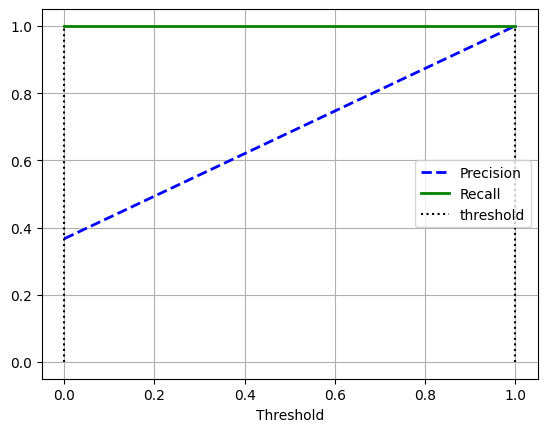

In [145]:
# Precision-Recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()



* The Precision-Recall curve visualizes the trade-off between precision and recall for different classification thresholds. Precision is plotted on the y-axis, and recall is plotted on the x-axis. Each point on the curve represents a different threshold for classifying instances as positive or negative. The curve summarizes the model's performance across various thresholds, allowing you to choose a suitable threshold based on your specific requirements. It is especially useful when dealing with imbalanced datasets or when the focus is on positive instances.

* Since the precision and recall is one the threshold holds better at the end 

In [146]:
# ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


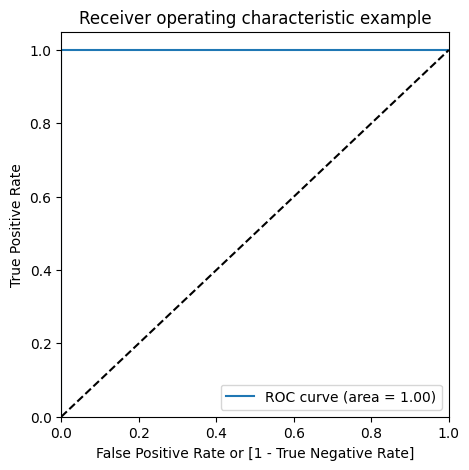

In [147]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
draw_roc(y_test, y_pred)

* The ROC curve illustrates the trade-off between the true positive rate (sensitivity or recall) and the false positive rate (1 - specificity) for different classification thresholds. The true positive rate is plotted on the y-axis, and the false positive rate is plotted on the x-axis. The curve shows how well the model can distinguish between positive and negative instances across various thresholds. The area under the ROC curve (AUC-ROC) is commonly used as a summary metric to measure the overall performance of the classifier. ROC curves are useful when the class distribution is balanced or when you want to evaluate the model's performance in terms of both true positives and true negatives.

* Here ROC contributes no much inference since the model is already perfect with true and false positive rate